In [ ]:

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
X.shape

(303, 13)

In [ ]:
y.shape


(303, 1)

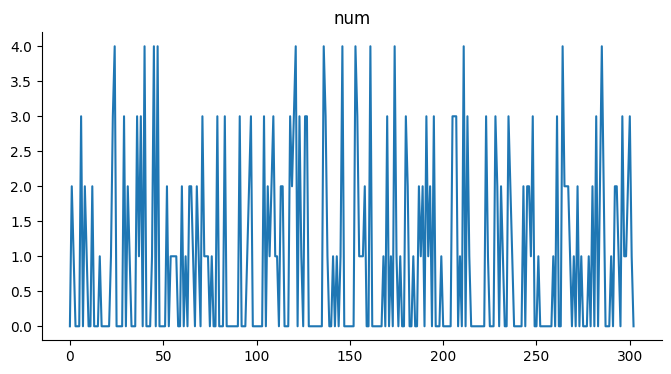

In [ ]:
# @title num

from matplotlib import pyplot as plt
y['num'].plot(kind='line', figsize=(8, 4), title='num')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import numpy as np

# Ensure y is a one-dimensional array
y = np.ravel(y)

# Check the distribution of target classes
class_distribution = np.bincount(y)
print("Class distribution:", class_distribution)


Class distribution: [164  55  36  35  13]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # For numerical data
X_imputed = imputer.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Using SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Stratified split of the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9024390243902439
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.86      0.78      0.82        32
           2       0.91      0.94      0.93        33
           3       0.94      0.88      0.91        33
           4       0.97      1.00      0.99        33

    accuracy                           0.90       164
   macro avg       0.90      0.90      0.90       164
weighted avg       0.90      0.90      0.90       164

Confusion Matrix:
 [[30  2  1  0  0]
 [ 4 25  1  1  1]
 [ 1  0 31  1  0]
 [ 1  2  1 29  0]
 [ 0  0  0  0 33]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Best Parameters:\n", best_params)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Accuracy: 0.9024390243902439
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.83      0.75      0.79        32
           2       0.89      0.94      0.91        33
           3       0.97      0.94      0.95        33
           4       0.97      1.00      0.99        33

    accuracy                           0.90       164
   macro avg       0.90      0.90      0.90       164
weighted avg       0.90      0.90      0.90       164

Confusion Matrix:
 [[29  3  1  0  0]
 [ 4 24  3  0  1]
 [ 1  0 31  1  0]
 [ 0  2  0 31  0]
 [ 0  0  0  0 33]]
Best Parameters:
 {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(rf, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))


Cross-validation scores: [0.84146341 0.90853659 0.92682927 0.93292683 0.92682927]
Mean CV score: 0.9073170731707318


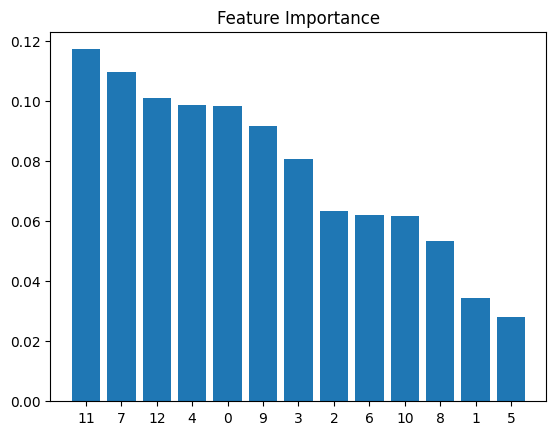

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


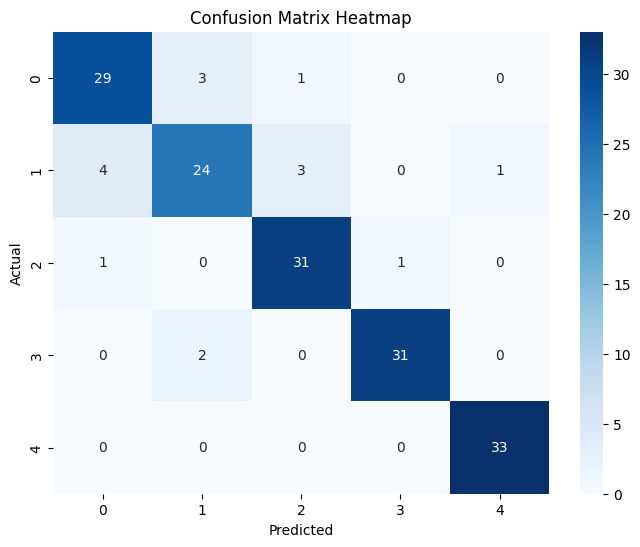

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


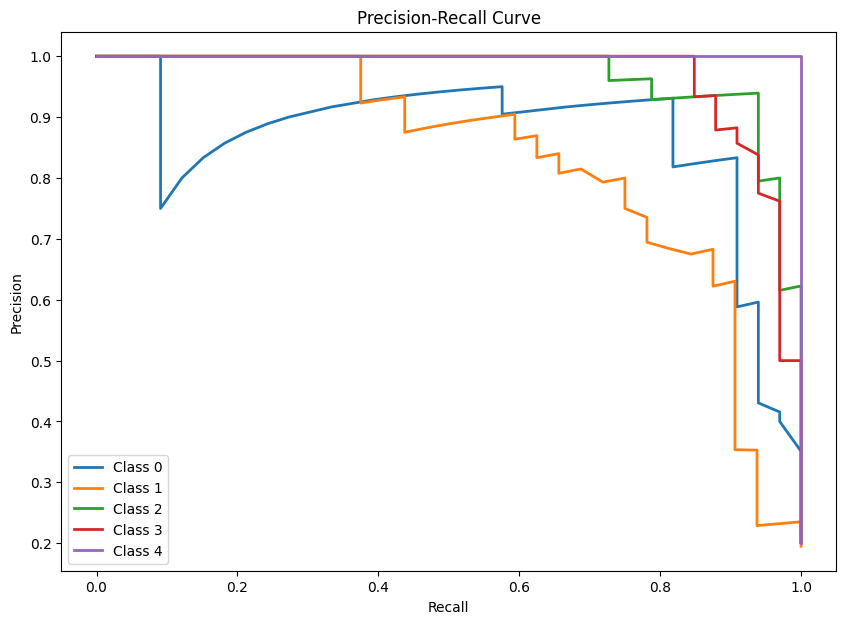

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_binarized.shape[1]

# Get the scores for each class
y_score = best_rf.predict_proba(X_test)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


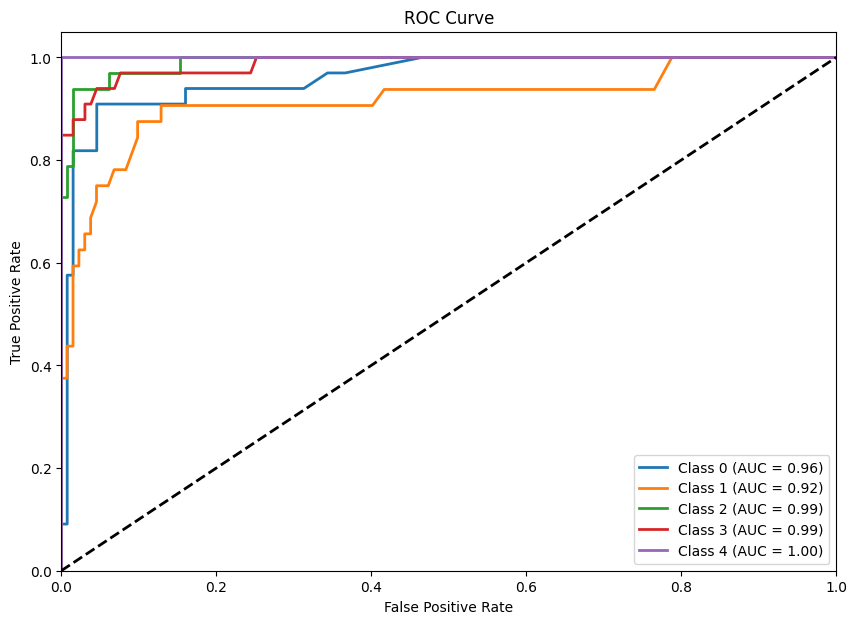

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


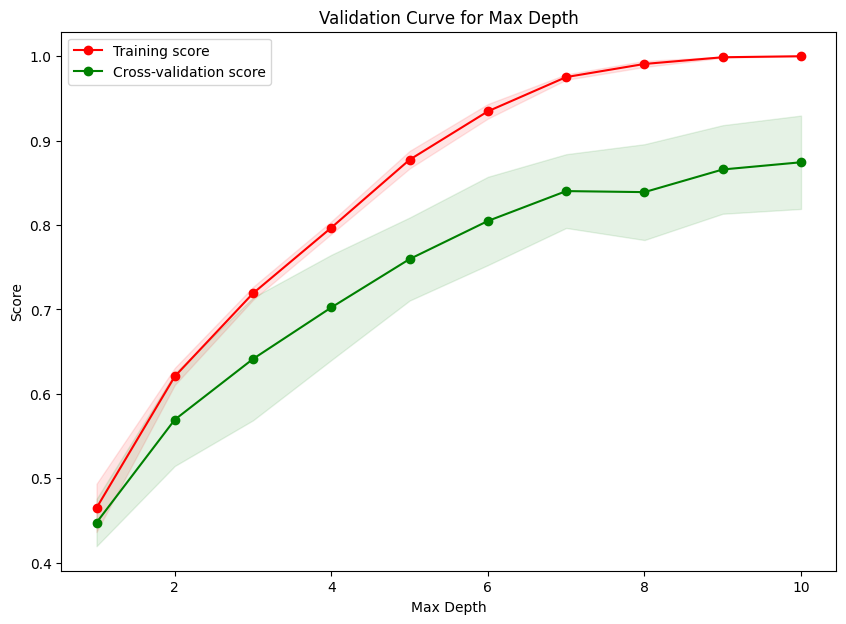

In [ ]:
from sklearn.model_selection import validation_curve

# Generate the validation curve
param_range = np.arange(1, 11, 1)
train_scores, test_scores = validation_curve(best_rf, X_resampled, y_resampled, param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 7))
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Validation Curve for Max Depth")
plt.legend(loc="best")
plt.show()


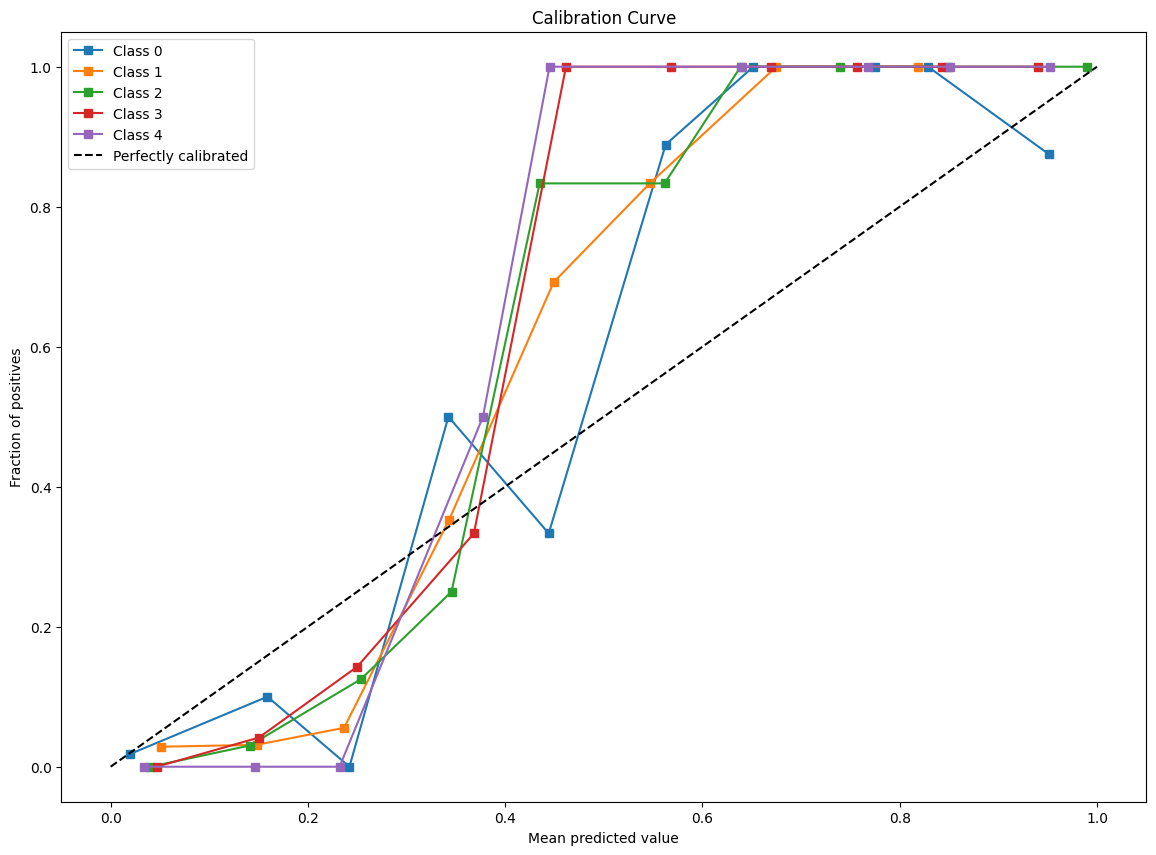

In [ ]:
from sklearn.calibration import calibration_curve

# Predict probabilities for each class
y_probs = best_rf.predict_proba(X_test)

# Generate calibration curve for each class
plt.figure(figsize=(14, 10))
for i in range(n_classes):
    prob_pos = y_probs[:, i]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_binarized[:, i], prob_pos, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=f'Class {i}')

plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve")
plt.legend(loc="best")
plt.show()


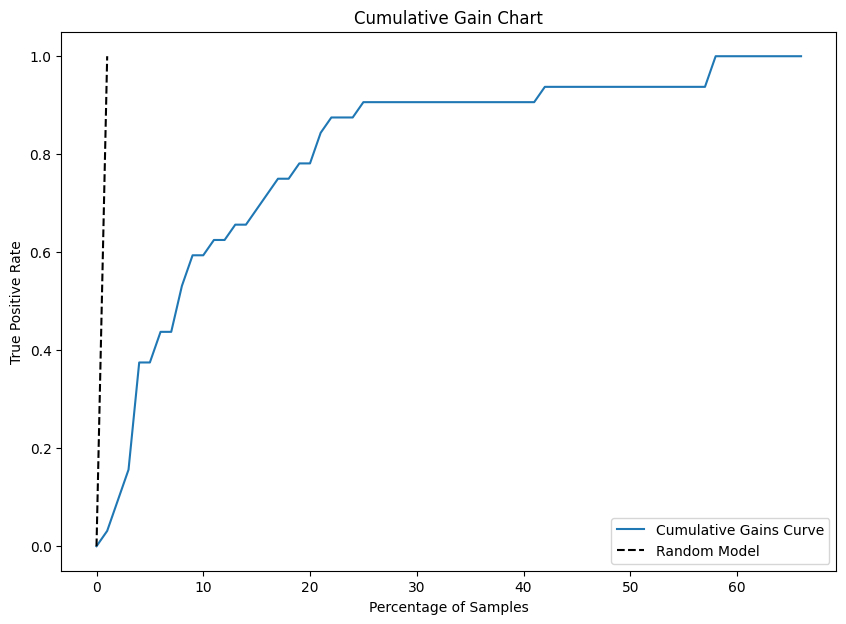

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test_binarized[:, 1], y_score[:, 1])

# Plot cumulative gain chart
plt.figure(figsize=(10, 7))
plt.plot(tpr, label='Cumulative Gains Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('Percentage of Samples')
plt.ylabel('True Positive Rate')
plt.title('Cumulative Gain Chart')
plt.legend(loc='best')
plt.show()


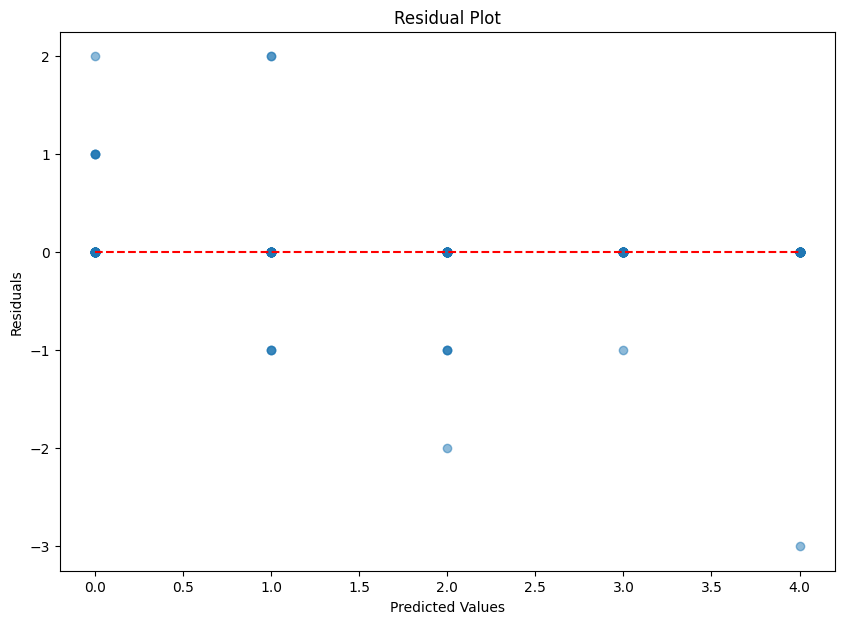

In [ ]:
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 7))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


<ipython-input-100-2f5e00d52834>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


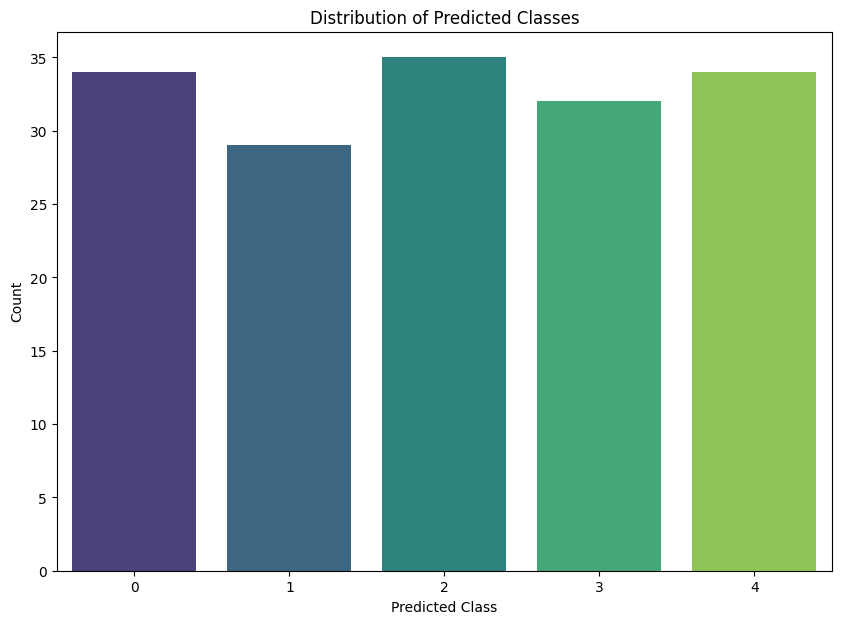

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of predicted classes
plt.figure(figsize=(10, 7))
sns.countplot(x=y_pred, palette="viridis")
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
plt.show()


**SVM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Combine SMOTE and ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_imputed, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize the model
lr = LogisticRegression(max_iter=200, random_state=42)

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5747126436781609
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.55      0.43      0.48        14
           2       1.00      0.32      0.48        19
           3       0.54      0.68      0.60        22
           4       0.56      0.72      0.63        25

    accuracy                           0.57        87
   macro avg       0.63      0.57      0.56        87
weighted avg       0.64      0.57      0.56        87

Confusion Matrix:
 [[ 5  2  0  0  0]
 [ 4  6  0  2  2]
 [ 0  1  6  7  5]
 [ 0  0  0 15  7]
 [ 1  2  0  4 18]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Initialize individual models with a different solver for Logistic Regression
clf1 = LogisticRegression(max_iter=200, solver='saga', random_state=42)
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier(random_state=42)

# Combine models into a voting classifier
eclf = VotingClassifier(estimators=[
    ('lr', clf1), ('knn', clf2), ('rf', clf3)], voting='soft')

# Train the voting classifier
eclf.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred = eclf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.9310344827586207
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.71      0.77        14
           2       0.95      0.95      0.95        19
           3       0.96      1.00      0.98        22
           4       0.96      1.00      0.98        25

    accuracy                           0.93        87
   macro avg       0.91      0.90      0.91        87
weighted avg       0.93      0.93      0.93        87

Confusion Matrix:
 [[ 6  1  0  0  0]
 [ 1 10  1  1  1]
 [ 0  1 18  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 25]]


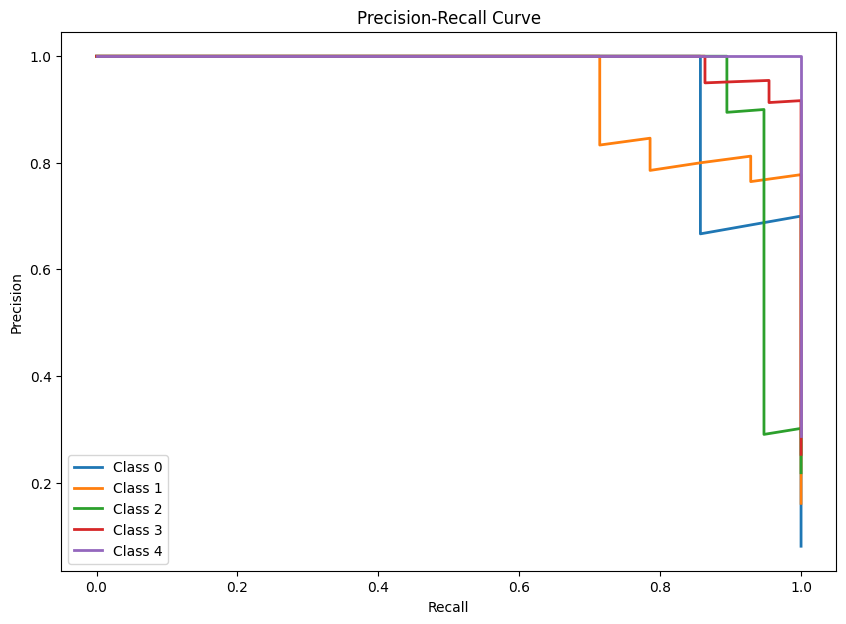

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the scores for each class
y_score = eclf.predict_proba(X_test)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


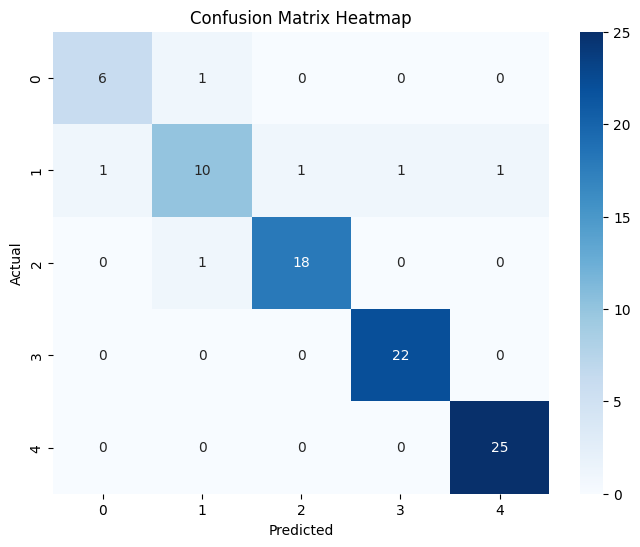

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


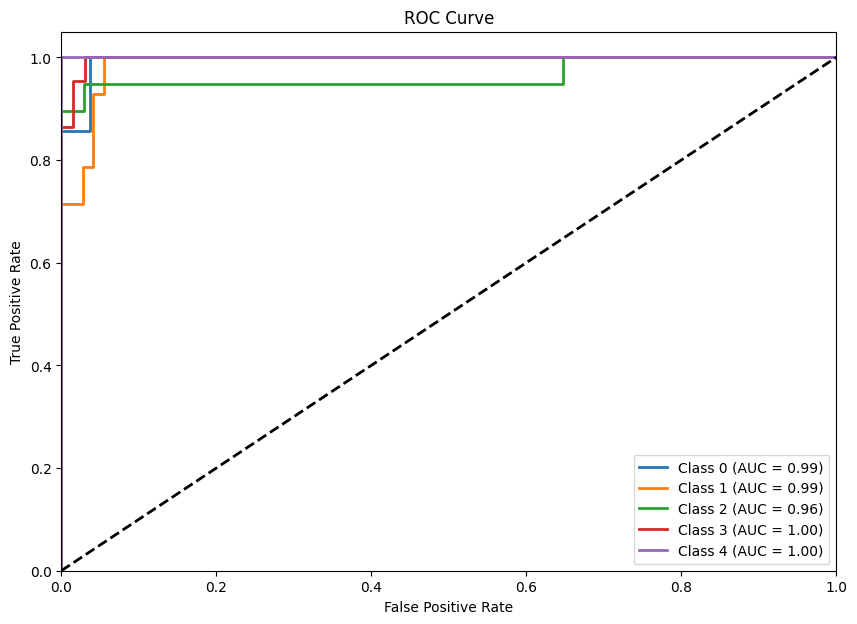

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


**Deep Learning**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Convert to categorical (one-hot encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.2, random_state=42, stratify=y_resampled)


Epoch 1/100
21/21 [==============================] - 2s 16ms/step - loss: 1.9172 - accuracy: 0.2500 - val_loss: 1.7638 - val_accuracy: 0.4878
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 1.7789 - accuracy: 0.3095 - val_loss: 1.6411 - val_accuracy: 0.5000
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 1.6578 - accuracy: 0.3979 - val_loss: 1.5362 - val_accuracy: 0.5305
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 1.5725 - accuracy: 0.4512 - val_loss: 1.4566 - val_accuracy: 0.5427
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 1.5120 - accuracy: 0.4787 - val_loss: 1.4116 - val_accuracy: 0.5732
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 1.4724 - accuracy: 0.4909 - val_loss: 1.3782 - val_accuracy: 0.6037
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 1.4237 - accuracy: 0.4909 - val_loss: 1.3457 - val_accuracy: 0.5854
Epoch 8/100


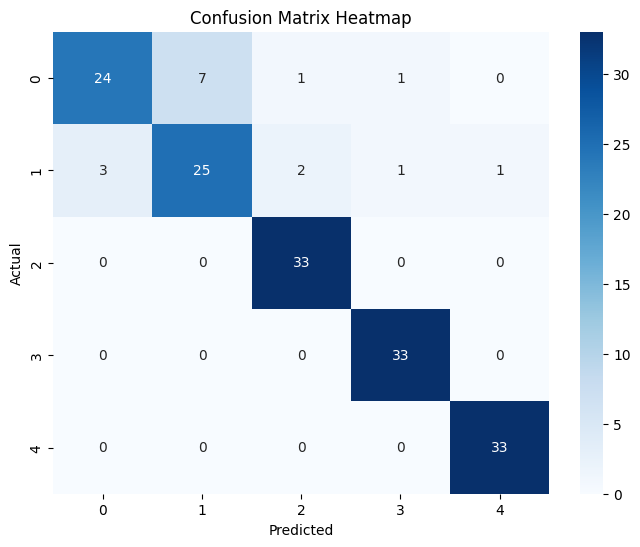

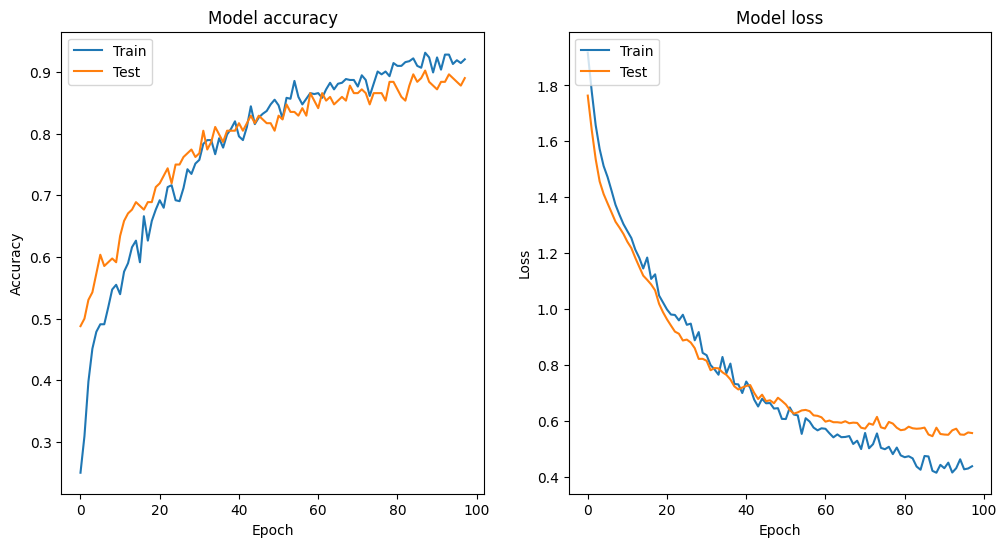

In [ ]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np



# Build a more complex neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(y_resampled_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping with Increased Patience
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
